# Project overview

* The goal of this project is to perform a segmentation of clients from historical data of their purchases made on a online marketplace.
* The data is unlabeled.
* The problem is an unsupervised clustering task.

# Aggregating tables 

* The database contains multiple tables.
* We will aggregate each table when needed and merge ot with the table they communicate it.
* For each table we will create one feature that counts the number of occurrences for each key of the table
* Numeric features of interest will be aggregated by mean.
* Categorical features of interest will be aggregated by most common value, or one-hot-encoded if the number of labels is low, then aggregated as numeric features.

In [1]:
from build_table import aggregate

data = aggregate()

(96096, 22)


# Cleaning

## Head

In [2]:
data.head()

n_orders per customer  n_items per order  \
customer_unique_id                                                           
0000366f3b9a7992bf8c76cfdf3221e2                      1                1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                      1                1.0   
0000f46a3911fa3c0805444483337064                      1                1.0   
0000f6ccb0745a6a4b88665a16c9f078                      1                1.0   
0004aac84e0df4da2b147fca70cf8255                      1                1.0   

                                   price  freight_value  product_name_lenght  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2  129.90          12.00                 60.0   
0000b849f77a49e4a4ce2b2a4ca5be3f   18.90           8.29                 56.0   
0000f46a3911fa3c0805444483337064   69.00          17.22                 49.0   
0000f6ccb0745a6a4b88665a16c9f078   25.99          17.63                 43.0   
0004aac84e0df4da2b147fca70cf8255  180.00          16.89                 58.0   

                                  product_description_lenght  \
customer_unique_id                                             
0000366f3b9a7992bf8c76cfdf3221e2                       236.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                       635.0   
0000f46a3911fa3c0805444483337064                       177.0   
0000f6ccb0745a6a4b88665a16c9f078                      1741.0   
0004aac84e0df4da2b147fca70cf8255                       794.0   

                                  product_photos_qty  product_weight_g  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2                 1.0            1500.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                 1.0             375.0   
0000f46a3911fa3c0805444483337064                 3.0            1500.0   
0000f6ccb0745a6a4b88665a16c9f078                 5.0             150.0   
0004aac84e0df4da2b147fca70cf8255                 3.0            6050.0   

                                  product_length_cm  product_height_cm  ...  \
customer_unique_id                                                      ...   
0000366f3b9a7992bf8c76cfdf3221e2               34.0                7.0  ...   
0000b849f77a49e4a4ce2b2a4ca5be3f               26.0               11.0  ...   
0000f46a3911fa3c0805444483337064               25.0               50.0  ...   
0000f6ccb0745a6a4b88665a16c9f078               19.0                5.0  ...   
0004aac84e0df4da2b147fca70cf8255               16.0                3.0  ...   

                                  payment_type_credit_card  \
customer_unique_id                                           
0000366f3b9a7992bf8c76cfdf3221e2                       1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                       1.0   
0000f46a3911fa3c0805444483337064                       1.0   
0000f6ccb0745a6a4b88665a16c9f078                       1.0   
0004aac84e0df4da2b147fca70cf8255                       1.0   

                                  payment_type_boleto  payment_type_voucher  \
customer_unique_id                                                            
0000366f3b9a7992bf8c76cfdf3221e2                  0.0                   0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                  0.0                   0.0   
0000f46a3911fa3c0805444483337064                  0.0                   0.0   
0000f6ccb0745a6a4b88665a16c9f078                  0.0                   0.0   
0004aac84e0df4da2b147fca70cf8255                  0.0                   0.0   

                                  payment_type_debit_card  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                      0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                      0.0   
0000f46a3911fa3c0805444483337064                      0.0   
0000f6ccb0745a6a4b88665a16c9f078                      0.0   
0004aac84e0df4da2b147fca70cf8255                 

## Shape

In [3]:
data.shape

(96096, 22)

## Duplicates

In [4]:
len(data) == data.index.nunique()

True

We control that there are no duplicates in the table.

## Missing values

<AxesSubplot:>

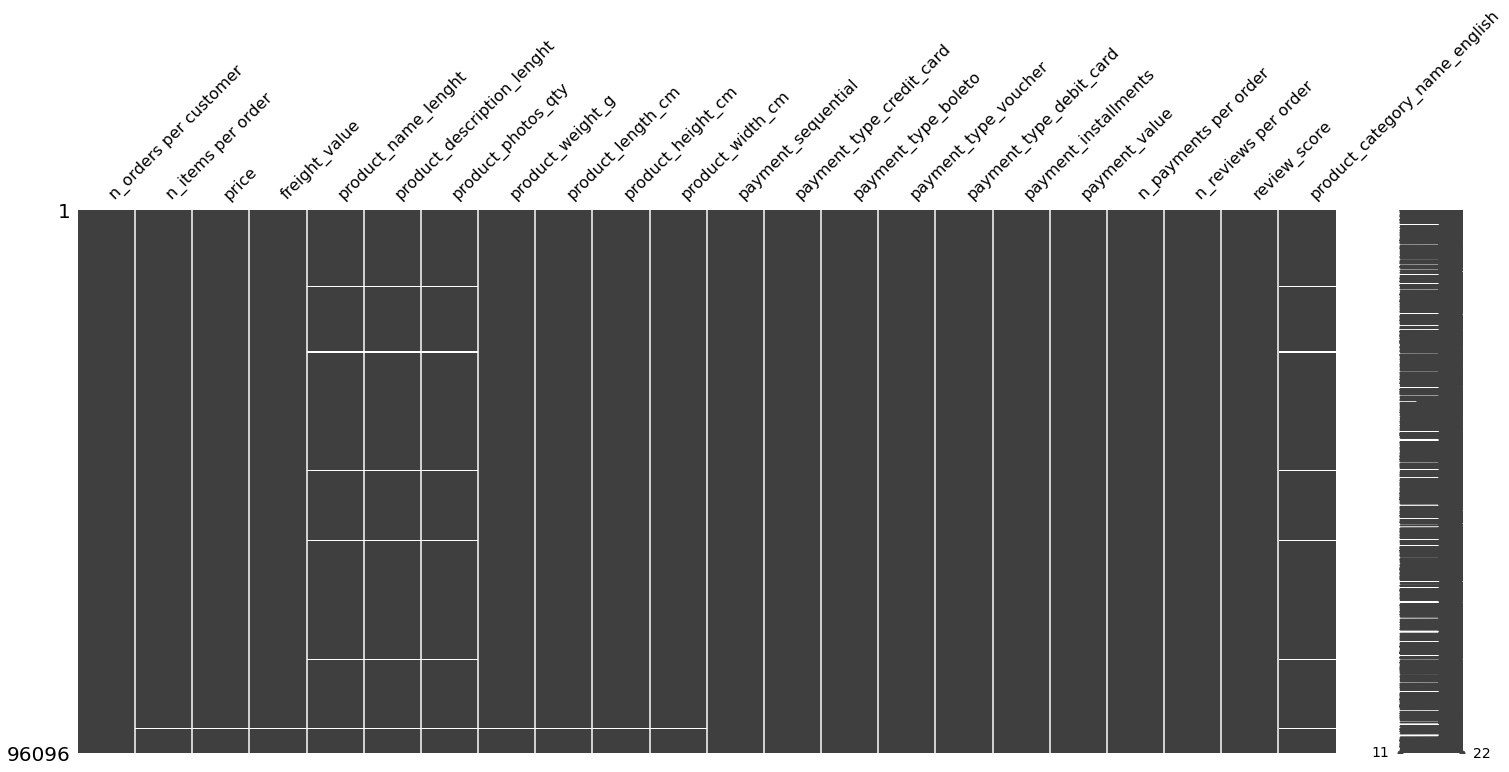

In [5]:
import missingno as msno

msno.matrix(data)

* There are very few missing values in the table.
* We can see that there are some lines where value is missing for many features though.
* We will delete these samples before further analysis.

### Dropping samples

In [8]:
import numpy as np

def drop_missing(data):
    
    data = data.copy()
    ### features where values are missing
    features = ['price','n_items per order','product_category_name_english']
    
    mask = np.logical_and.reduce([data[feature].isnull() for feature in features])
    
    data = data[~mask]
    
    return data
    

In [9]:
data = drop_missing(data)

<AxesSubplot:>

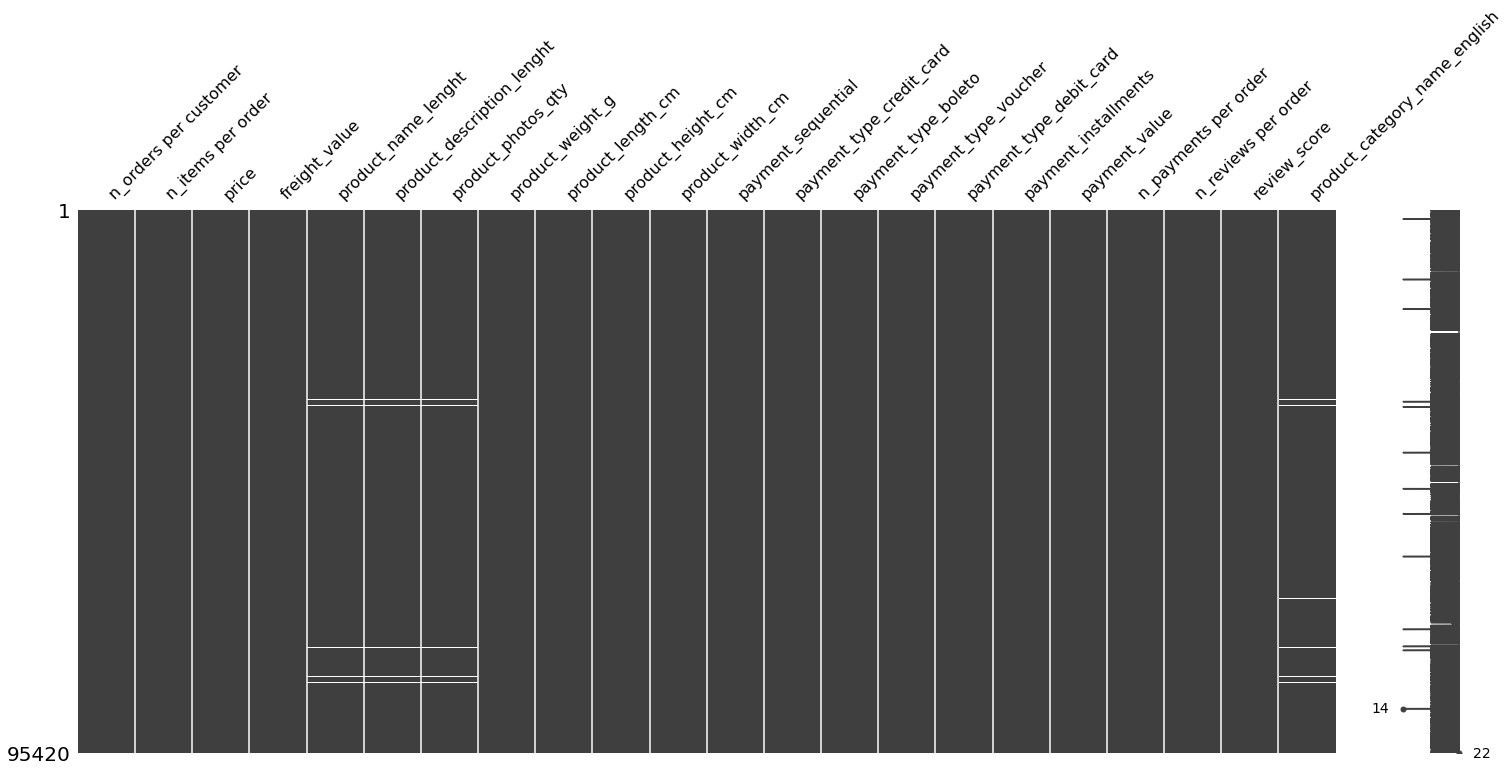

In [10]:
msno.matrix(data)

Data is cleaner.

## Outliers

In [11]:
data.describe()

n_orders per customer  n_items per order         price  freight_value  \
count           95420.000000        95420.00000  95420.000000   95420.000000   
mean                1.034961            1.13910    126.555747      20.229826   
std                 0.214869            0.52688    191.751327      15.824074   
min                 1.000000            1.00000      0.850000       0.000000   
25%                 1.000000            1.00000     42.900000      13.370000   
50%                 1.000000            1.00000     79.445000      16.405833   
75%                 1.000000            1.00000    139.900000      21.220000   
max                17.000000           21.00000   6735.000000     409.680000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count         94108.000000                94108.000000        94108.000000   
mean             48.837694                  795.896936            2.255267   
std               9.901907                  650.552859            1.735339   
min               5.000000                    4.000000            1.000000   
25%              43.000000                  354.000000            1.000000   
50%              52.000000                  612.000000            2.000000   
75%              57.000000                  998.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  ...  \
count      95407.000000       95407.000000       95407.000000  ...   
mean        2108.006589          30.092223          16.516907  ...   
std         3743.120812          15.991382          13.250589  ...   
min            0.000000           7.000000           2.000000  ...   
25%          300.000000          18.000000           8.000000  ...   
50%          700.000000          25.000000          13.000000  ...   
75%         1825.000000          38.000000          20.000000  ...   
max        40425.000000         105.000000         105.000000  ...   

       payment_sequential  payment_type_credit_card  payment_type_boleto  \
count        95419.000000              95419.000000          95419.00000   
mean             1.022819                  0.757969              0.19909   
std              0.188953                  0.421027              0.39847   
min              1.000000                  0.000000              0.00000   
25%              1.000000                  0.500000              0.00000   
50%              1.000000                  1.000000              0.00000   
75%              1.000000                  1.000000              0.00000   
max             15.000000                  1.000000              1.00000   

       payment_type_voucher  payment_type_debit_card  payment_installments  \
count          95419.000000             95419.000000          95419.000000   
mean               0.027419                 0.015518              2.902725   
std                0.144816                 0.123071              2.676740   
min                0.000000                 0.000000              0.000000   
25%                0.000000                 0.000000              1.000000   
50%                0.000000                 0.000000              2.000000   
75%                0.000000                 0.000000              4.000000   
max                1.000000                 1.000000             24.000000   

       payment_value  n_payments per order  n_reviews per order  review_score  
count   95419.000000          95419.000000         95420.000000  95420.000000  
mean      158.403876              1.044017             1.003217      4.086918  
std       218.399751              0.373714             0.049649      1.338476  
min         1.856818              1.000000             1.000000      1.000000  
25%        60.805000              1.000000             1.000000      4.000000  
50%       103.755000              1.000000             1.000000      5.000000  
75% 

Minimum and maximum values for numerical features are consistent. There are no negative nor impossible values.

# Exploration

## Product category feature

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def categorical_plot(data):
    
    fig = plt.figure(figsize = (9,6))
    g = fig.add_subplot(111)
    g = sns.countplot(data['product_category_name_english'])
    g.set_xticks(np.arange(0,data['product_category_name_english'].nunique(),1))
    plt.xticks(fontsize = 8, rotation = 90)
    

/home/marco/anaconda3/envs/olist/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


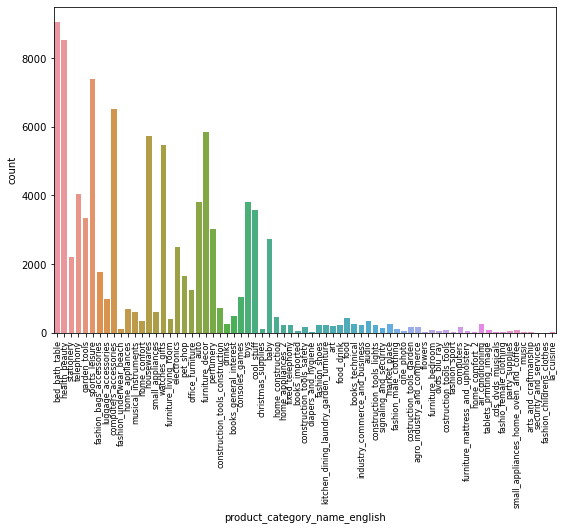

In [13]:
categorical_plot(data)

* The 'product_category' feature has many labels, with some labels being represented by very little number of samples.

* We may merge these categories into fewer ones to be able to use this feature during modelling.

* The mapping between old and new labels should be meaningful. 


###  Product_category engineering : mapping

In [14]:
def catogories_mapping():
    family = ['bed_bath_table', 'furniture_decor', 'garden_tools', 'home_appliances',
          'home_construction', 'home_confort', 'furniture_living_room',
          'kitchen_dining_laundry_garden_furniture',
          'home_appliances_2', 'costruction_tools_garden',
          'furniture_bedroom',
          'small_appliances_home_oven_and_coffee',
          'furniture_mattress_and_upholstery', 'home_comfort_2',
          'la_cuisine', 'fixed_telephony', 'toys',
          'cool_stuff', 'baby', 'fashion_childrens_clothes',
          'christmas_supplies', 'air_conditioning',
          'housewares', 'pet_shop', 'small_appliances',
          'diapers_and_hygiene', 'party_supplies',
          'cine_photo', 'dvds_blu_ray', 'tablets_printing_image',
          'sports_leisure',
          'watches_gifts', 'flowers', 'auto',
          'food', 'drinks', 'food_drink', 'agro_industry_and_commerce']


    business = ['security_and_services',
                'construction_tools_safety', 'construction_tools_construction', 'costruction_tools_tools',
                'signaling_and_security', 'construction_tools_lights',
                'industry_commerce_and_business',
                'market_place',
                'office_furniture',
                'stationery']


    electronics_sport = ['computers_accessories', 'telephony', 'electronics',
                         'consoles_games', 'audio',
                         'computers', 'fashion_male_clothing']


    fashion_beauty = ['fashion_bags_accessories', 'luggage_accessories', 'fashion_shoes',
                      'fashion_underwear_beach',
                      'fashio_female_clothing', 'fashion_sport', 'health_beauty', 'perfumery']

    culture = ['books_technical', 'arts_and_craftmanship', 'books_imported', 'books_general_interest',
               'music', 'cds_dvds_musicals', 'art', 'musical_instruments']
    
    
    list_of_categories = [family, business, electronics_sport, fashion_beauty, culture]
    
    return list_of_categories

In [15]:
list_of_categories = catogories_mapping()

### Transformation

In [18]:
from sklearn.impute import SimpleImputer

def category_engineering(data):
    
    imputer = SimpleImputer(strategy = 'most_frequent')
    data.loc[:,'product_category_name_english'] = imputer.fit_transform(data
            ['product_category_name_english'].values.reshape(-1,1))
        
    conditions = [data['product_category_name_english'].isin(category) 
            for category in list_of_categories]

    choices = ['family', 'business',
           'electronics_sport', 'fashion_beauty', 'culture']
    
    data.loc[:,'product_category_name_english'] = np.select(conditions, choices, default=np.nan)
    
    return data
    

In [19]:
data = category_engineering(data)

/home/marco/anaconda3/envs/olist/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


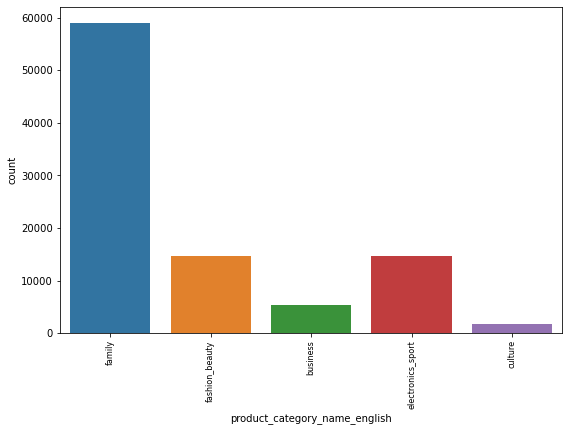

In [20]:
categorical_plot(data)

* The new feature has only five labels.
* Distribution is quite unbalanced, with 'family' the main category.
* However each label is represented by a reasonable amount of samples.

## Numeric features

### Distributions

In [21]:
### Displays distributions of the numerical features 
def num_distrib(data):
    
    fig = plt.figure(figsize = (16,20))
    
    for i, feature in enumerate(data.columns[(data.dtypes == 'float64') | (data.dtypes == 'int64') ]):
        g = fig.add_subplot(6,5,i+1)
        g = sns.histplot(x = feature, data = data)
        
    fig.tight_layout()

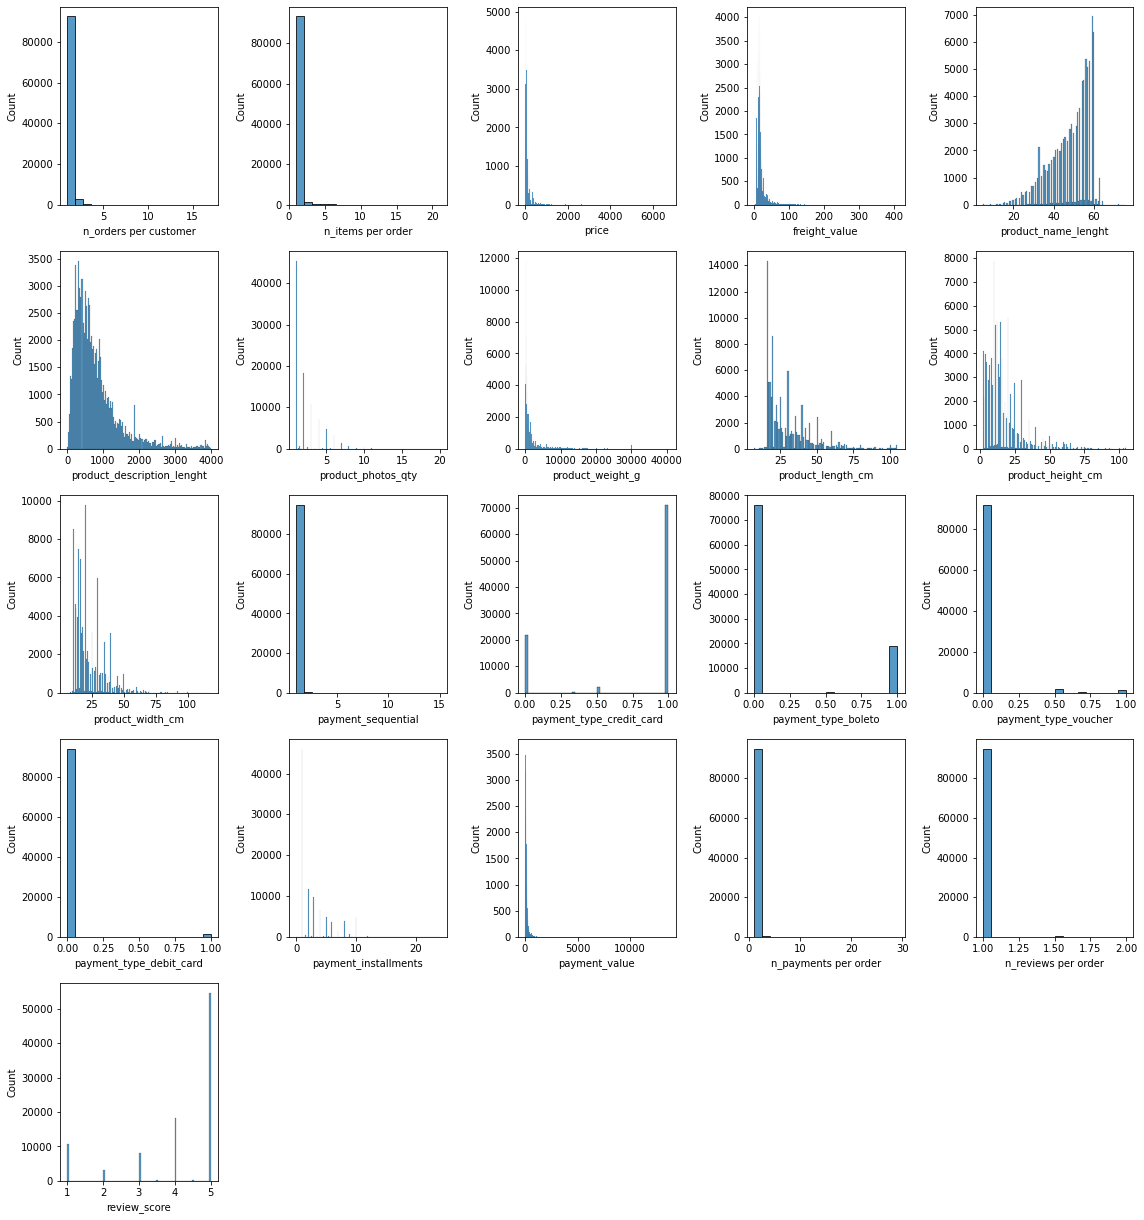

In [22]:
num_distrib(data)

* Most of the distributions are strongly skewed to the right.
* A log-transformation of the features may be needed here to normalize the distributions.
* Gaussian-like distributions is a key assumption of some clustering algorithms such as KMeans.

### Log-transformation

In [25]:
import pandas as pd

def log_transform(data):
    
    data = data.copy()
    
    num_data = data.select_dtypes(['int64', 'float64'])
    
    num_data = np.log(num_data + 1)
    
    cat_data = data.select_dtypes('object')
    
    data = pd.concat([num_data,cat_data], axis = 1)
    
    return data

In [26]:
data = log_transform(data)

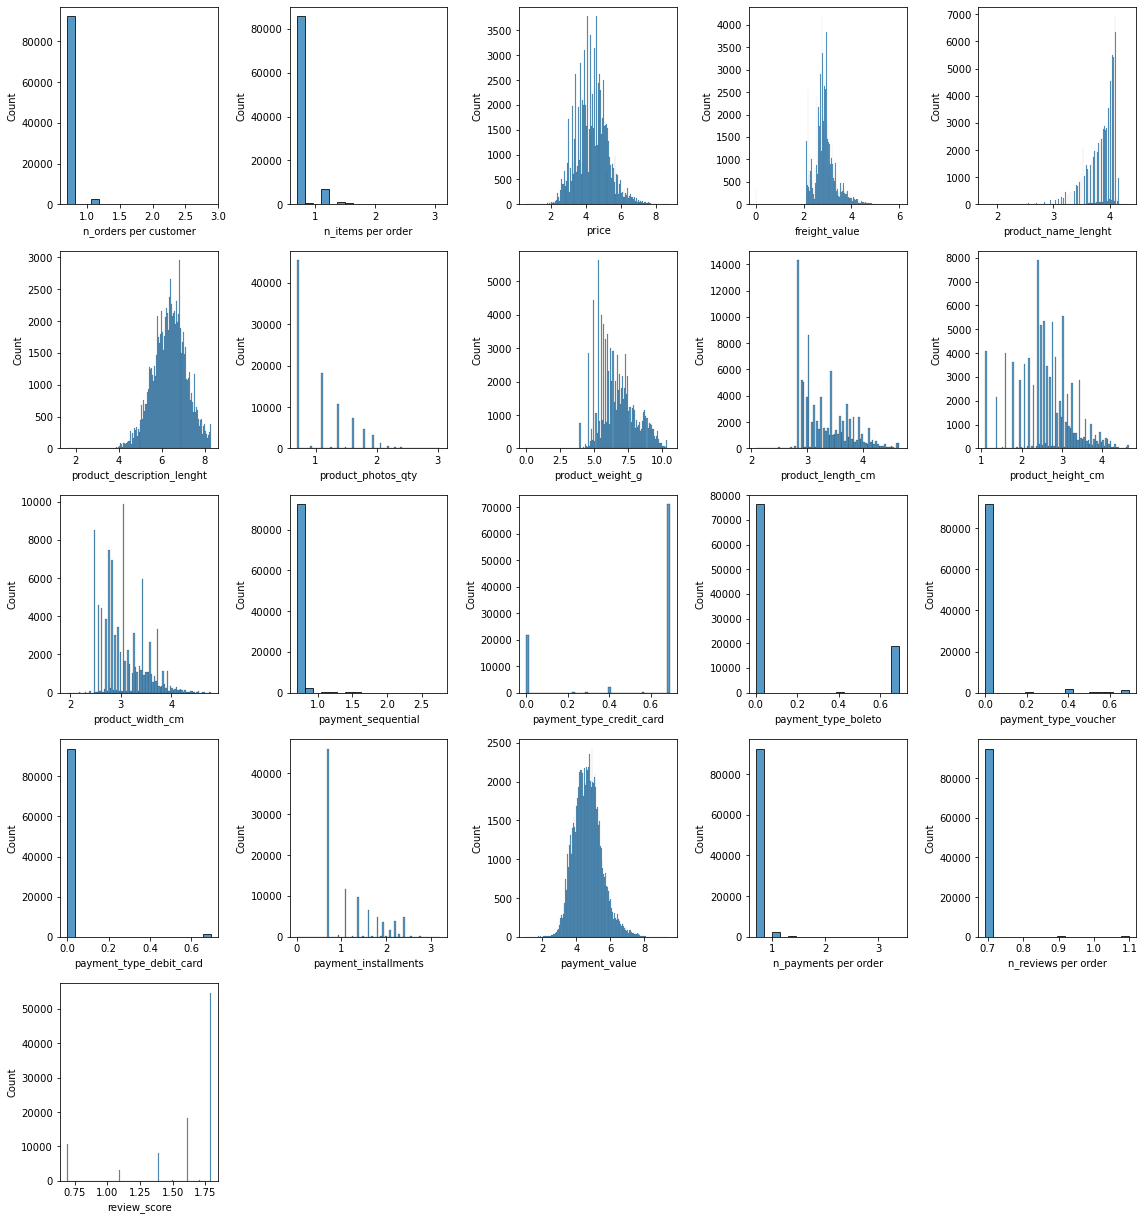

In [27]:
num_distrib(data)

* The distributions of continuous features such as price, payment, freight_value are more Gaussian-like after log-transformation.
* The log-transformation did not serve to normalize features with discrete values. The distributions remain skewed to the left.
* However we will perform the transformation as well to be consistent accross features.

### Feature engineering

#### Volume = length *  width * height 


* From product length, width & height we will create one 'volume' feature that will be the product of the values within these three features for each sample

In [28]:
def volume_feature(data):
    
    features = ['product_length_cm', 'product_height_cm', 'product_width_cm']
    
    data['volume_cm3'] = np.multiply.reduce([data[feature] for feature in features])
    
    data = data.drop(features, axis = 1)
    
    return data

In [29]:
data = volume_feature(data)

In [30]:
data.describe()

n_orders per customer  n_items per order         price  freight_value  \
count           95420.000000       95420.000000  95420.000000   95420.000000   
mean                0.706791           0.743137      4.386255       2.910567   
std                 0.078424           0.164566      0.903624       0.503086   
min                 0.693147           0.693147      0.615186       0.000000   
25%                 0.693147           0.693147      3.781914       2.665143   
50%                 0.693147           0.693147      4.387574       2.856805   
75%                 0.693147           0.693147      4.948050       3.100993   
max                 2.890372           3.091042      8.815222       6.017814   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count         94108.000000                94108.000000        94108.000000   
mean              3.884518                    6.393814            1.071581   
std               0.233789                    0.775154            0.440515   
min               1.791759                    1.609438            0.693147   
25%               3.784190                    5.872118            0.693147   
50%               3.970292                    6.418365            1.098612   
75%               4.060443                    6.906755            1.386294   
max               4.343805                    8.292298            3.044522   

       product_weight_g  payment_sequential  payment_type_credit_card  \
count      95407.000000        95419.000000              95419.000000   
mean           6.704360            0.702163                  0.526857   
std            1.328409            0.060132                  0.290994   
min            0.000000            0.693147                  0.000000   
25%            5.707110            0.693147                  0.405465   
50%            6.552508            0.693147                  0.693147   
75%            7.509883            0.693147                  0.693147   
max           10.607228            2.772589                  0.693147   

       payment_type_boleto  payment_type_voucher  payment_type_debit_card  \
count         95419.000000          95419.000000             95419.000000   
mean              0.138158              0.020338                 0.010787   
std               0.276333              0.105121                 0.085437   
min               0.000000              0.000000                 0.000000   
25%               0.000000              0.000000                 0.000000   
50%               0.000000              0.000000                 0.000000   
75%               0.000000              0.000000                 0.000000   
max               0.693147              0.693147                 0.693147   

       payment_installments  payment_value  n_payments per order  \
count          95419.000000   95419.000000          95419.000000   
mean               1.179742       4.685888              0.708218   
std                0.568948       0.812900              0.096914   
min                0.000000       1.049708              0.693147   
25%                0.693147       4.123984              0.693147   
50%                1.098612       4.651624              0.693147   
75%                1.609438       5.170938              0.693147   
max                3.218876       9.522599              3.401197   

       n_reviews per order  review_score    volume_cm3  
count         95420.000000  95420.000000  95407.000000  
mean              0.694512      1.575608     27.817288  
std               0.020749      0.353372     11.402713  
min               0.693147      0.693147      5.859627  
25%               0.693147      1.609438     19.696823  
50%               0.693147      1.791759     25.676687  
75%               0.693147      1.791759     35.270078  
max               1.098612      1.791759     74.856632

In [31]:
def plot_per_category(data):
    
    fig = plt.figure(figsize = (16,16))
    
    g = sns.pairplot(data,
                 hue='product_category_name_english')

<Figure size 1152x1152 with 0 Axes>

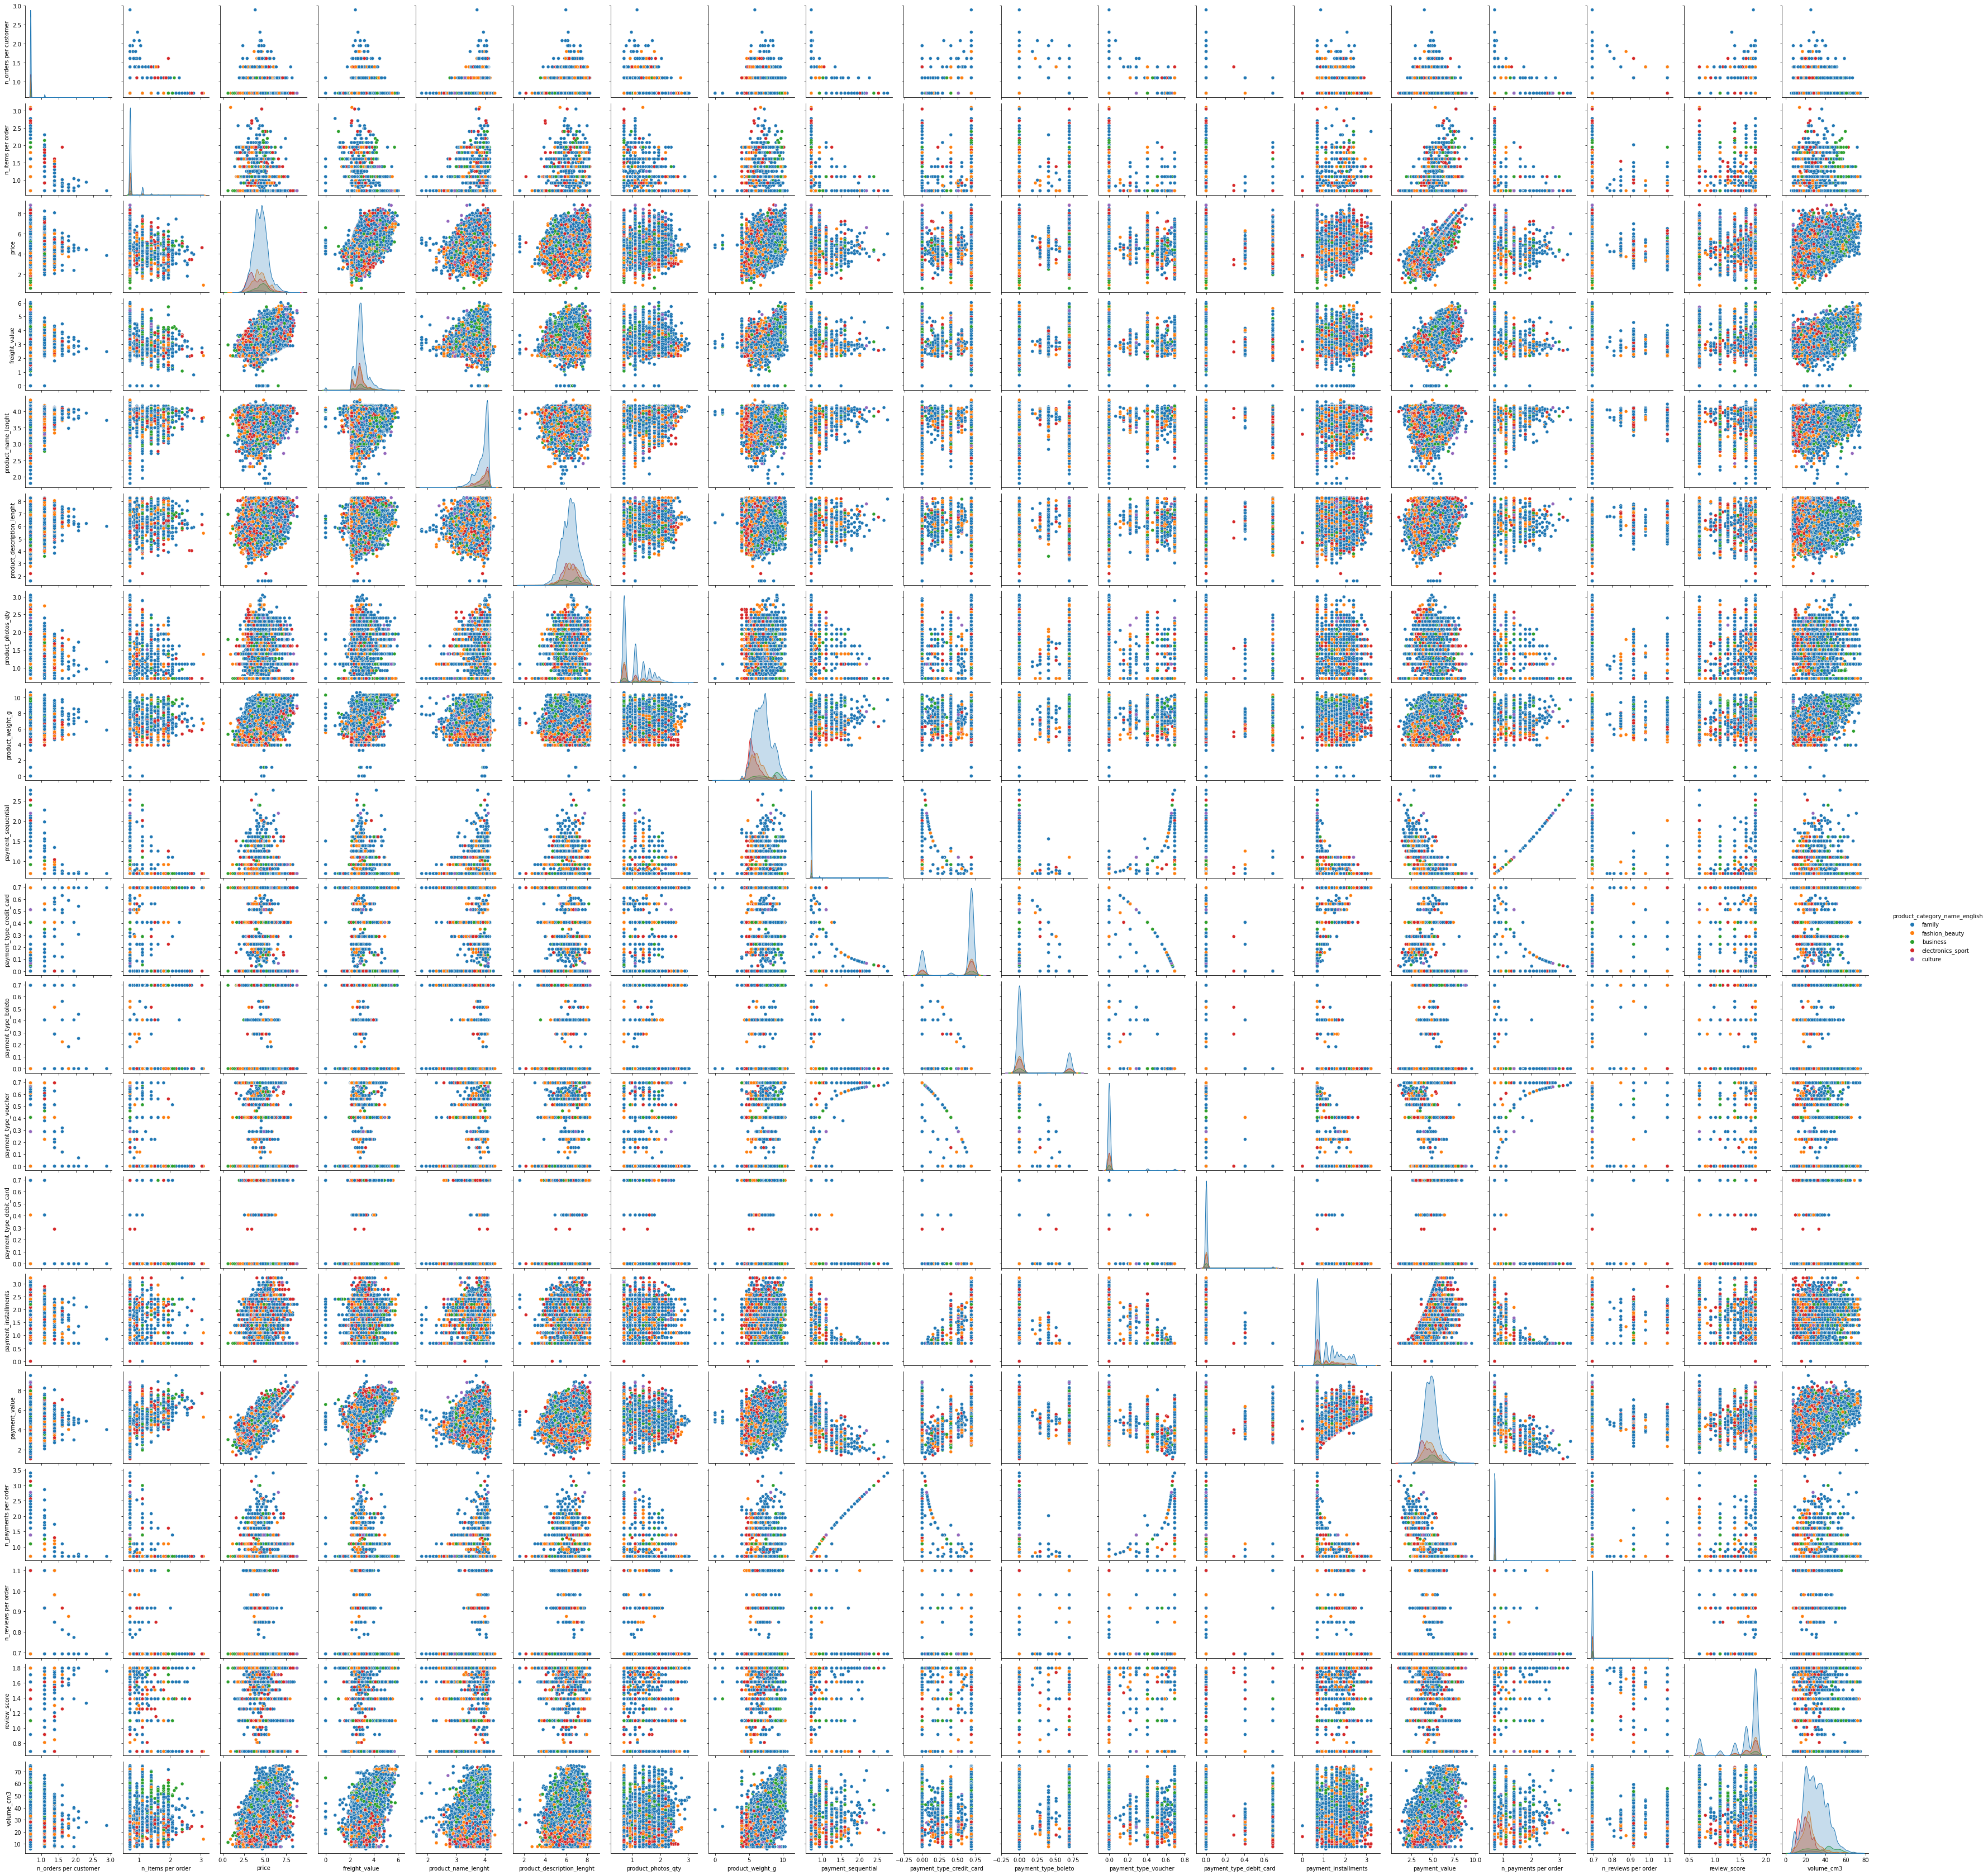

In [32]:
plot_per_category(data)

### Exporting aggregated data for modelling

In [35]:
data.to_csv('Data/cleaned_data.csv')